# Homework 1 - Regression methods

## Exercise 2
### Part 1)  
Parameteriaztion of a dataset fitting a second order polynomial

<IPython.core.display.Javascript object>


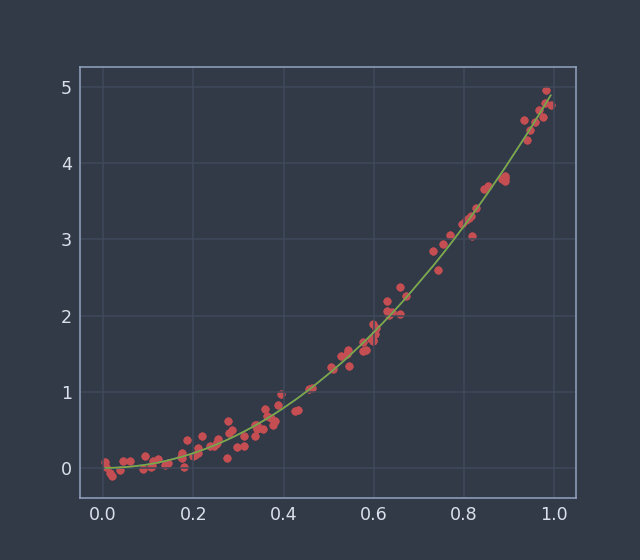

In [10]:
import numpy as np
import matplotlib.pyplot as plt

try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

sample_size = 100

#generate some data
np.random.seed(100)
x = np.random.rand(sample_size)
y = 5*x**2 + 0.1*np.random.randn(sample_size)


#design matrix with column entries 1, x, x**2
X = np.zeros((sample_size, 3))

X[:, 0] = 1
X[:, 1] = x
X[:, 2] = x**2

#find parameters beta
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

#find yvals
y_tilde = X @ beta

#get idx of sorted x-values
idx_sorted = np.argsort(x)

%matplotlib notebook
#plot result
plt.scatter(x, y, color='r')
plt.plot(x[idx_sorted], y_tilde[idx_sorted])

### Part 2)  
Compare above results with scikit-learn

<IPython.core.display.Javascript object>


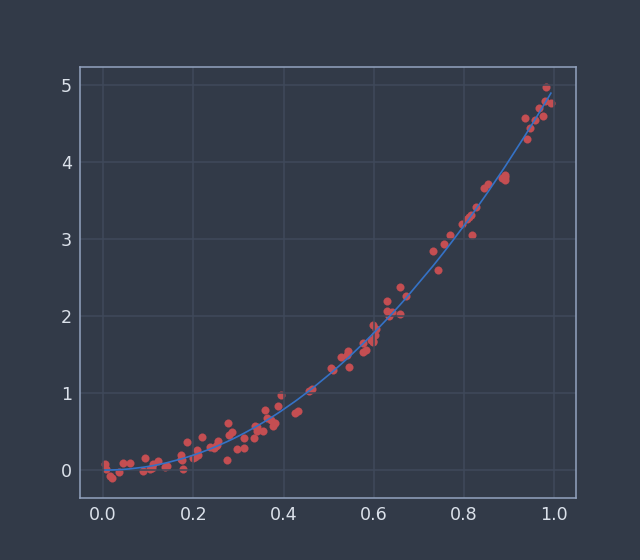

In [13]:
import sklearn.linear_model as skl


#predict yvals with skl
clf = skl.LinearRegression().fit(X, y)
ytilde_skl = clf.predict(X)

%matplotlib notebook
plt.scatter(x, y, color='r')
plt.plot(x[idx_sorted], ytilde_skl[idx_sorted])

### Part 3)  
Finding the mean squared error and the R2 score with scikit learn

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MSE = mean_squared_error(y, ytilde_skl)
R2 = r2_score(y, ytilde_skl)

print("MSE: %.3f " %MSE)
print("R2 score: %.3f" %R2)

MSE: 0.012 
R2 score: 0.995
